In [17]:
import matplotlib.pyplot as plt
import geopy.distance
import networkx as nx
import pandas as pd
import numpy as np
import regex as re
import requests
import os

# defaults
adjacency_path = os.path.join("test_adjacency.csv")

# global vars
counties = {}
adj_g = None

# classes
class County:
    def __init__(self, txt:str):
        self.name = txt.split(",")[0]
        self.state = txt.split(",")[1]
        self.neighbors = []

        self.g = np.inf # distance from start
        self.h = np.inf # heuristic distance from the goal
        self.f = self.g + self.h
    
    def add_neighbor(self, neighbor):
        if f"{self.name}, {self.state}" != f"{neighbor.name}, {neighbor.state}":
            self.neighbors.append(neighbor)

# reads the csv file and converts it into a dataframe
def read_neighbors_file(file_name: os) -> pd.DataFrame:
    return pd.read_csv(file_name)

# returns the unique values in a df[col_name]
def get_unique_list(df: pd.DataFrame, col_name: str) -> list:
    return list(set(df[col_name]))

# gets a list of text and returns a list of County objects
def make_object_list(lst: list) -> list:
    return [County(c) for c in lst]

# making the dataframe into objects and adding their neighbors
def preparing_objects(raw_df: pd.DataFrame) -> dict:
    unique_counties = get_unique_list(raw_df, 'countyname')
    county_objects = make_object_list(unique_counties) 
    counties_dict = {county.name + "," + county.state: county for county in county_objects}
    for _, record in raw_df.iterrows():
        county = record['countyname']
        neighbor = record['neighborname']
        cnty_object = counties_dict[county]
        neighbor_object = counties_dict[neighbor]
        cnty_object.add_neighbor(neighbor_object)
    return counties_dict

# build a graph using the counties and neighbors dicts
def add_to_graph() -> nx.Graph:
    g = nx.Graph()
    for county in counties.values():
        county_id = county.name + ',' + county.state
        # adds the county node if it doesn't already exist
        if county_id not in g.nodes:
            g.add_node(county_id, header=county_id, visited = False, object = counties[county_id])
        
        # connects the county node to its neighboring county nodes
        for neighbor in county.neighbors:
            neighbor_id = neighbor.name + ',' + neighbor.state
            # if the neighbor is already in the graph, connect them
            if neighbor_id in g.nodes:
                g.add_edge(county_id, neighbor_id)
            # if the neighbor is not in the graph, create it and then connect them
            else:
                g.add_node(neighbor_id, header=neighbor_id, visited = False, object = counties[neighbor_id])
                g.add_edge(county_id, neighbor_id)
    return g
        
if __name__ == "__main__":
    # initiallizing
    raw_df = read_neighbors_file(adjacency_path)
    counties = preparing_objects(raw_df) # dict: {county.name, county.state: county object}. this is the same dict as neighbors so it is enough for one of them
    adj_g = add_to_graph()
    


In [18]:
# finds the shortest path from the starting locations to the goal location
# using a search method - an integer
# details_output = {F: showing only the paths, T: prints the first iteration and the heuristic value of the first steps -> <value, value, value, ...>}
def find_path(starting_locations ,goal_locations ,search_method, detail_output):
    if (search_method == 1):
        path = a_star(starting_locations, goal_locations,detail_output)
    else: # will have other algorythems
        pass

# gets two names of counties and return the geographical distance between them in km
def heuristic_calc(county1: str, county2: str) -> float:
    # gets the county coordinates using it's name and state - using the attached url
    def get_county_coordinates(county_name: str) -> tuple:
        """
        Get the latitude and longitude coordinates of a state using its name.
        """
        url = f"https://nominatim.openstreetmap.org/search?q={county_name}&format=json"
        response = requests.get(url)
        if response.status_code == 200:
            data = response.json()
            if data:
                return float(data[0]['lat']), float(data[0]['lon'])
        return None
    coord1 = get_county_coordinates(county1)
    coord2 = get_county_coordinates(county2)
    return geopy.distance.geodesic(coord1, coord2).km

# preform a* search from a starting location to one of the ending locations in the goal list - all in the same color party
# i assume that len(starting_locations) == len(goal_locations)
def a_star(starting_locations: list, goal_locations: list, detail_output: int):
    for start_loc in starting_locations:
        visited = [] # will contain only the nodes that has been visited at
        expanded = [] # will contain only the nodes that has been visited and expanded
    if detail_output == 1:
        pass
    elif detail_output == 0:
        pass
    else:
        print('detailed output is only 1 or 0.')


# input
start_locations = ['Red, Washington County, UT', 'Blue, Chicot County, AR']
goal_locations = ['Red, San Diego, CA', 'Blue, Bienville Parish, LA']

# returns a list for the same color
def get_list_per_color(lst: list, pattern: re.Pattern) -> list:
    return [loc.replace('Red, ','').replace('Blue, ', '') for loc in lst if re.search(pattern, loc)]

# dividing the starting locations and goal locations into different lists according to their colors.
red_starts = get_list_per_color(start_locations, r'Red, \w*')
red_goals = get_list_per_color(goal_locations, r'Red, \w*')
blue_starts = get_list_per_color(start_locations, r'Blue, \w*')
blue_goals = get_list_per_color(goal_locations, r'Blue, \w*')

# red parties paths
find_path(red_starts, red_goals, 1, 0)



# Vizualisation


San Diego County, CA
San Bernardino County, CA
Orange County, CA
Riverside County, CA
Imperial County, CA
Lincoln County, NV
Washington County, UT
Mohave County, AZ
Los Angeles County, CA
Iron County, UT
Kane County, UT
Kern County, CA
Coconino County, AZ
La Paz County, AZ
Yavapai County, AZ
Clark County, NV
Inyo County, CA


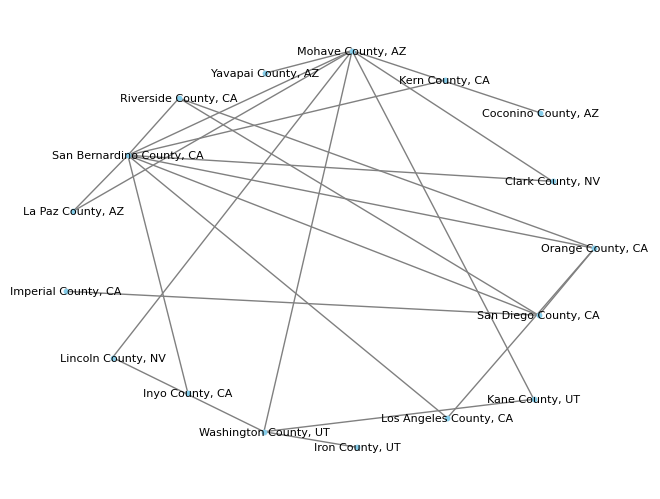

In [19]:

# Create an empty graph
g = nx.Graph()

for county in counties.values():
    county_id = county.name + ',' + county.state
    # adds the county node if it doesn't already exist
    if county_id not in g.nodes:
        g.add_node(county_id, header=county_id, visited = False)
    
    # connects the county node to its neighboring county nodes
    for neighbor in county.neighbors:
        neighbor_id = neighbor.name + ',' + neighbor.state
        # if the neighbor is already in the graph, connect them
        if neighbor_id in g.nodes:
            g.add_edge(county_id, neighbor_id)
        # if the neighbor is not in the graph, create it and then connect them
        else:
            g.add_node(neighbor_id, header=neighbor_id, visited = False)
            g.add_edge(county_id, neighbor_id)

for node_id in g.nodes:
    print(node_id)

# Compute the layout for the graph
pos = nx.spring_layout(g, k=5) # , iterations=100

# Draw the graph
nx.draw(g, pos, labels=nx.get_node_attributes(g, 'header'), with_labels=True, node_color='skyblue', node_size=10, font_size=8, edge_color='gray')

# Display the plot
plt.show()
